Load the Data

In [37]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [38]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [39]:
# load the dataset
df = pd.read_excel(r'C:\\Users\\ADMIN\\Downloads\\dataverse_files\\chemical_analysis.xlsx')

In [40]:
# Check the first few rows
print(df.head())

  sample_name      DM    NH4      N    CaO    K2O    MgO   P2O5  \
0   FBCRIF001  20.815  0.075  0.490    NaN    NaN    NaN    NaN   
1   FBCRIF002  25.480  0.182  0.607  0.157  0.791  0.079  0.131   
2   FBCRIF003  17.595  0.203  0.546  0.208  0.690  0.094  0.160   
3   FBCRIF004  19.110  0.091  0.482  0.260  0.542  0.121  0.187   
4   FBCRIF005  18.600  0.089  0.458    NaN    NaN    NaN    NaN   

     type_manure  spectrometer             township          country  
0  cattle manure  NIRFlex LDAR               DERVAL  mainland France  
1  cattle manure  NIRFlex LDAR               DERVAL  mainland France  
2  cattle manure  NIRFlex LDAR               DERVAL  mainland France  
3  cattle manure  NIRFlex LDAR  CHATEAUNEUF DU FAOU  mainland France  
4  cattle manure  NIRFlex LDAR  CHATEAUNEUF DU FAOU  mainland France  


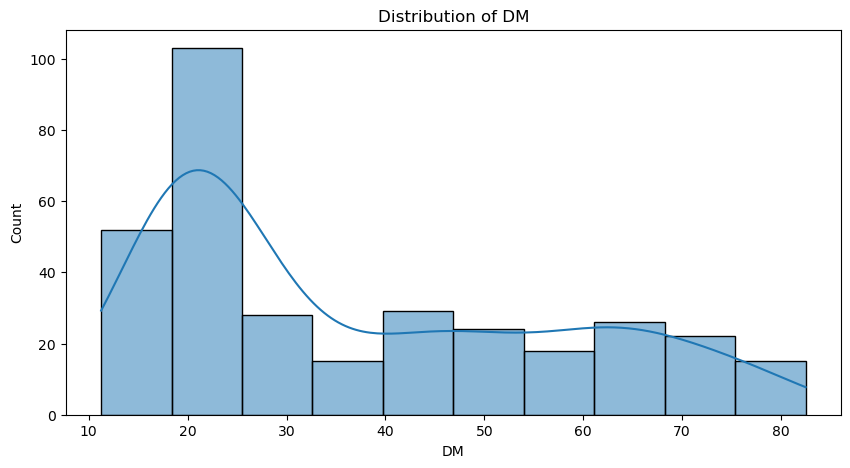

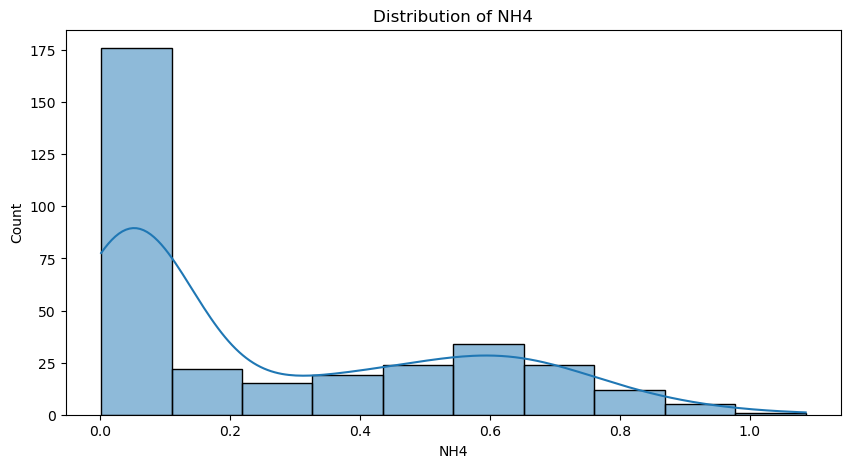

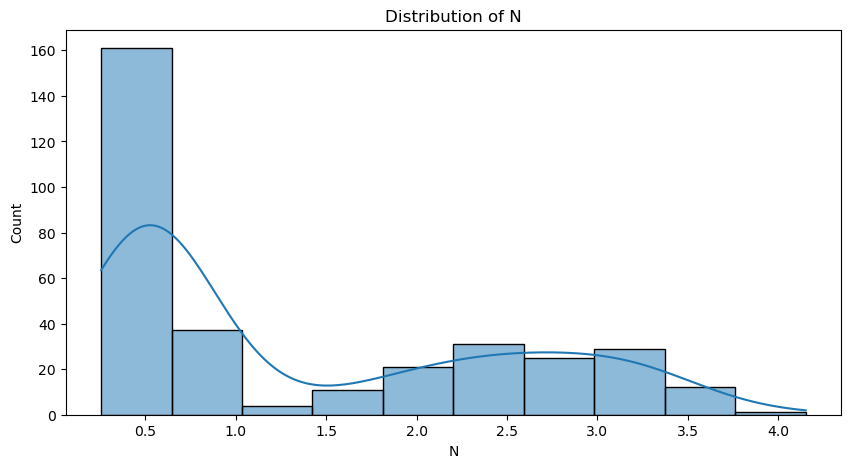

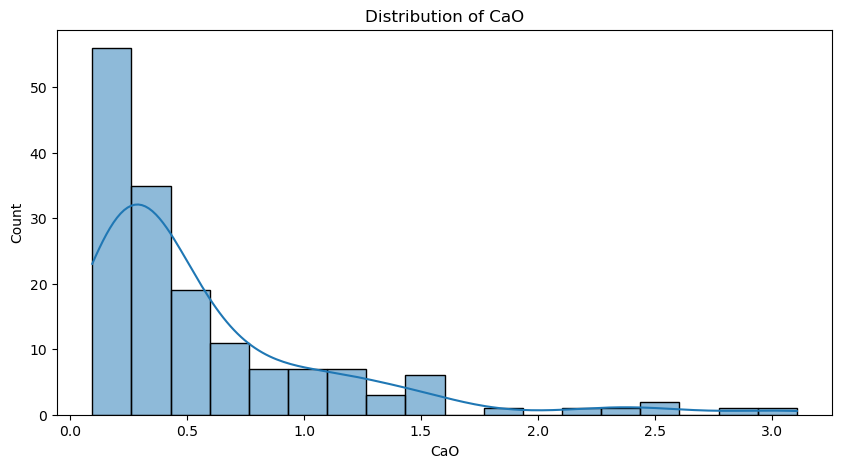

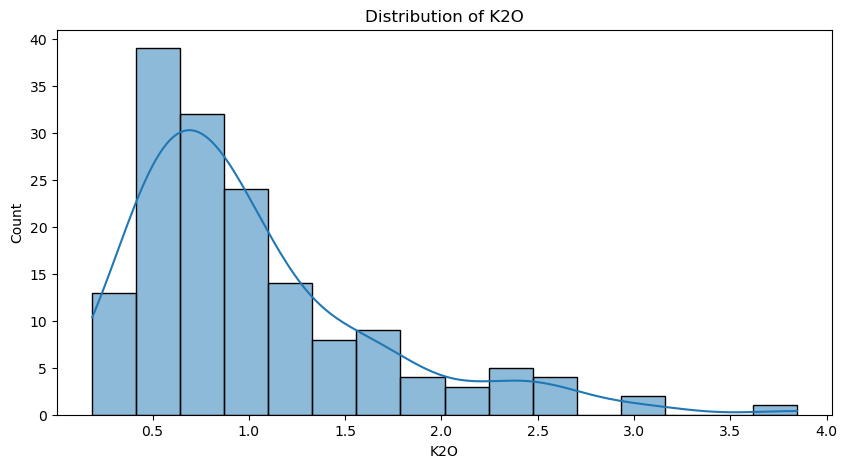

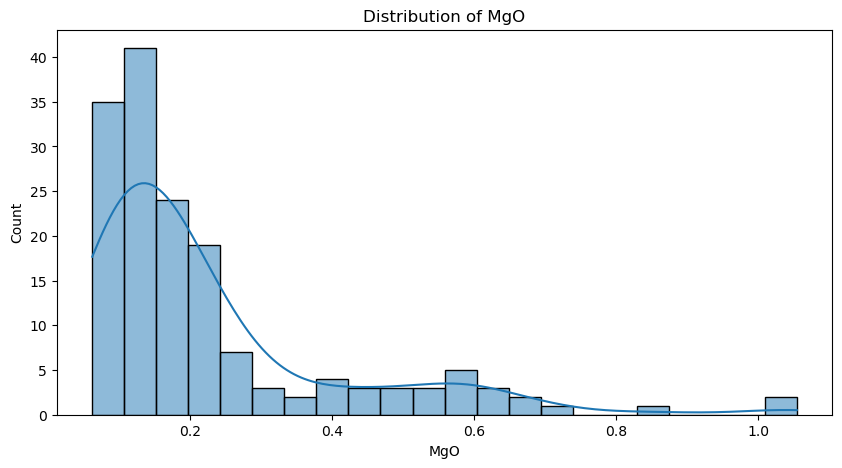

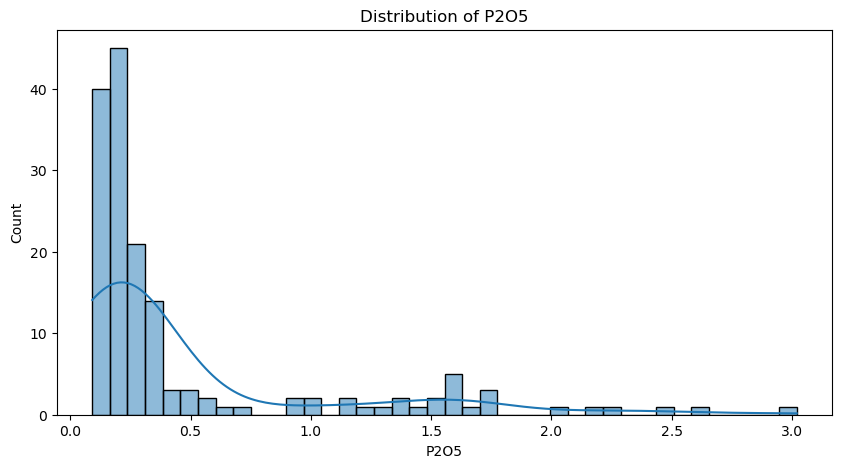

In [41]:
# --- Exploration et Visualisation des Données ---

import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des propriétés chimiques
for column in ['DM', 'NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5']:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10284\3227790827.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


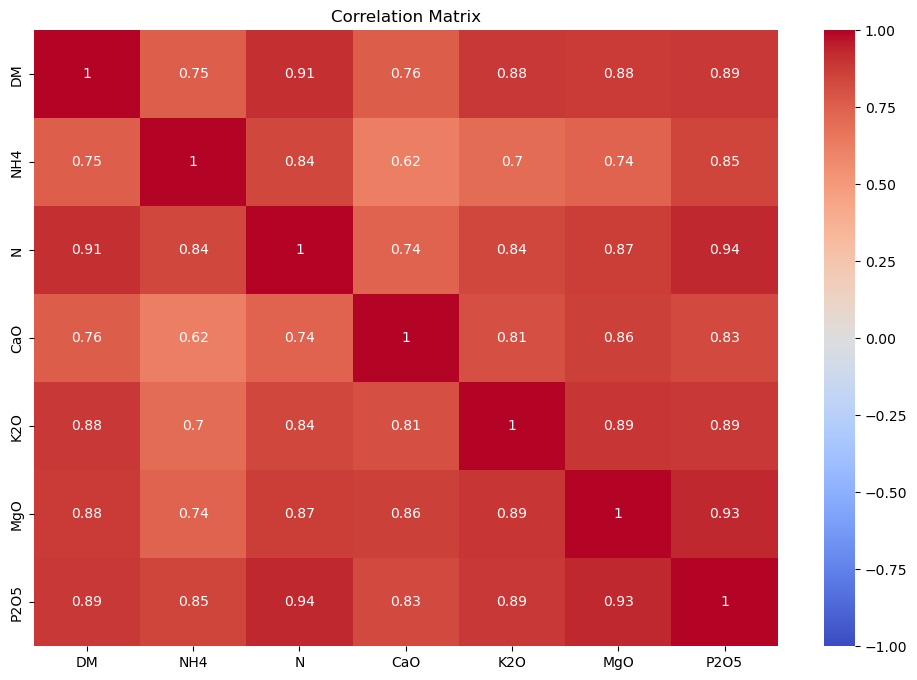

In [42]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [43]:
# Imputer les valeurs manquantes avec la moyenne
df.fillna(df.mean(numeric_only=True), inplace=True)

In [44]:
# Affichage des informations après imputation
print("\nInformations sur le dataset après imputation :")
print(df.info())


Informations sur le dataset après imputation :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample_name   332 non-null    object 
 1   DM            332 non-null    float64
 2   NH4           332 non-null    float64
 3   N             332 non-null    float64
 4   CaO           332 non-null    float64
 5   K2O           332 non-null    float64
 6   MgO           332 non-null    float64
 7   P2O5          332 non-null    float64
 8   type_manure   332 non-null    object 
 9   spectrometer  332 non-null    object 
 10  township      332 non-null    object 
 11  country       332 non-null    object 
dtypes: float64(7), object(5)
memory usage: 31.3+ KB
None


Preprocess the data

In [45]:
# Encode categorical variables
le_type_manure = LabelEncoder()
df['type_manure'] = le_type_manure.fit_transform(df['type_manure'])

le_spectrometer = LabelEncoder()
df['spectrometer'] = le_spectrometer.fit_transform(df['spectrometer'])

le_township = LabelEncoder()
df['township'] = le_township.fit_transform(df['township'])

le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

In [46]:
# Préparation des données
features = ['DM', 'NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5', 'type_manure', 'spectrometer', 'township', 'country']
X = df[features]
y = df[['DM', 'NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5']]

In [47]:
# Affichage des premières lignes après encodage pour vérification
print("\nPremières lignes après encodage :")
print(df.head())


Premières lignes après encodage :
  sample_name      DM    NH4      N       CaO       K2O       MgO      P2O5  \
0   FBCRIF001  20.815  0.075  0.490  0.574911  1.022418  0.226601  0.476652   
1   FBCRIF002  25.480  0.182  0.607  0.157000  0.791000  0.079000  0.131000   
2   FBCRIF003  17.595  0.203  0.546  0.208000  0.690000  0.094000  0.160000   
3   FBCRIF004  19.110  0.091  0.482  0.260000  0.542000  0.121000  0.187000   
4   FBCRIF005  18.600  0.089  0.458  0.574911  1.022418  0.226601  0.476652   

   type_manure  spectrometer  township  country  
0            0             0        20        1  
1            0             0        20        1  
2            0             0        20        1  
3            0             0        11        1  
4            0             0        11        1  


In [48]:
# Sélection des caractéristiques et des cibles
features = ['type_manure', 'spectrometer', 'township', 'country']
X = df[features]

In [49]:
# Propriétés chimiques à prédire
targets = ['DM', 'NH4', 'N', 'CaO', 'K2O', 'MgO', 'P2O5']

In [50]:
# Initialisation des résultats
results = {}

In [51]:
# Entraînement et évaluation pour chaque propriété chimique
for target in targets:
    y = df[target]

In [52]:
# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Standardisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Création des modèles
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [55]:
# Entraînement des modèles
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [56]:
# Création du modèle de stacking
estimators = [
    ('lr', lr),
    ('rf', rf),
    ('gbr', gbr)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gbr',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [57]:
# Prédictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_gbr = gbr.predict(X_test_scaled)
y_pred_stacking = stacking_regressor.predict(X_test_scaled)


In [58]:
# Évaluation des modèles
def evaluate_model(y_true, y_pred, model_name):
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return mse, r2

mse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, 'Régression Linéaire')
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, 'Forêt Aléatoire')
mse_gbr, r2_gbr = evaluate_model(y_test, y_pred_gbr, 'Boosting Gradient')
mse_stacking, r2_stacking = evaluate_model(y_test, y_pred_stacking, 'Stacking')


In [59]:
# Stockage des résultats
results[target] = {
        'Régression Linéaire': {'MSE': mse_lr, 'R2': r2_lr},
        'Forêt Aléatoire': {'MSE': mse_rf, 'R2': r2_rf},
        'Boosting Gradient': {'MSE': mse_gbr, 'R2': r2_gbr},
        'Stacking': {'MSE': mse_stacking, 'R2': r2_stacking}
    }

In [60]:
# Affichage des résultats
for target, metrics in results.items():
    print(f"\nÉvaluation pour {target}:")
    for model_name, metric in metrics.items():
        print(f"{model_name} - MSE: {metric['MSE']}, R2: {metric['R2']}")


Évaluation pour P2O5:
Régression Linéaire - MSE: 0.10139800492004973, R2: 0.35536858246997627
Forêt Aléatoire - MSE: 0.06016566970016991, R2: 0.6175005516524249
Boosting Gradient - MSE: 0.05301430159513038, R2: 0.6629649230911482
Stacking - MSE: 0.06473332698035797, R2: 0.5884619587369075


In [61]:
 # Sauvegarde du modèle de stacking pour chaque propriété chimique
 joblib.dump(stacking_regressor, f'stacking_model_{target}.pkl')

['stacking_model_P2O5.pkl']